# ✅ 1. Advanced Single-Qubit Gates

## 🎯 Objective:

Understand how gates like S, T, RX, RY, RZ rotate or shift the qubit’s phase or position on the Bloch sphere.

| Gate    | Effect                          | Matrix / Description             |
|---------|----------------------------------|----------------------------------|
| **S**   | Adds π/2 phase to \|1⟩          | `[[1, 0], [0, i]]`               |
| **T**   | Adds π/4 phase to \|1⟩          | `[[1, 0], [0, exp(iπ/4)]]`       |
| **RZ(θ)** | Rotation around Z by θ         | `[[1, 0], [0, exp(iθ)]]`         |
| **RX(θ)** | Rotation around X by θ         | `cos(θ/2)I - i sin(θ/2)X`        |
| **RY(θ)** | Rotation around Y by θ         | `cos(θ/2)I - i sin(θ/2)Y`        |

In [240]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from math import pi

qc = QuantumCircuit(1)

# Apply H to get to |+> state (on equator, +X direction)
qc.h(0)

# Apply S gate (adds phase of π/2)
qc.s(0)

# Show final state vector
ψ = Statevector.from_instruction(qc)
ψ.draw(output='latex')    


<IPython.core.display.Latex object>

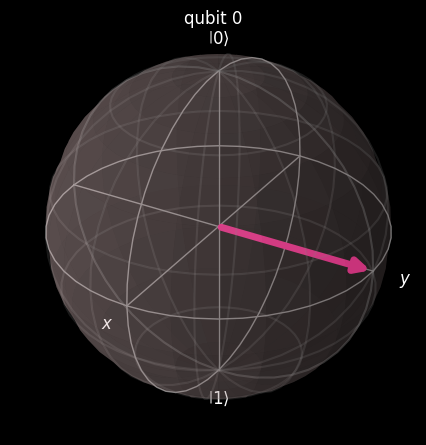

In [241]:
ψ.draw('bloch')

In [242]:
qx = QuantumCircuit(1)
qx.h(0)
qx.t(0)
ρ=Statevector.from_instruction(qx)
ρ.draw(output='latex')

<IPython.core.display.Latex object>

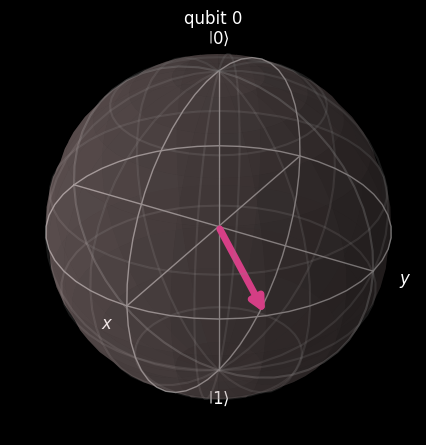

In [243]:
ρ.draw('bloch')

In [244]:
qz = QuantumCircuit(1)
qz.h(0)
qz.rz(pi/3,0)
ψ1= Statevector.from_instruction(qz)
ψ1.draw('latex')

<IPython.core.display.Latex object>

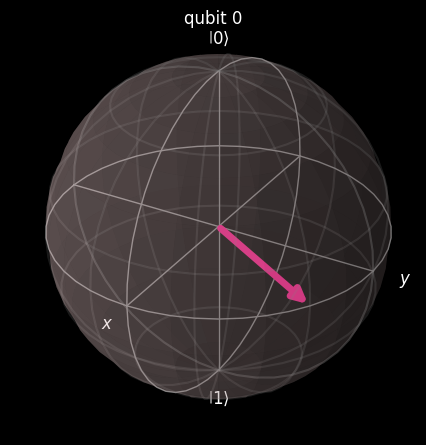

In [245]:
ψ1.draw('bloch')

In [246]:
qy = QuantumCircuit(1)
qy.h(0)
qy.ry(pi/6,0)
ψ2= Statevector.from_instruction(qy)
ψ2.draw('latex')

<IPython.core.display.Latex object>

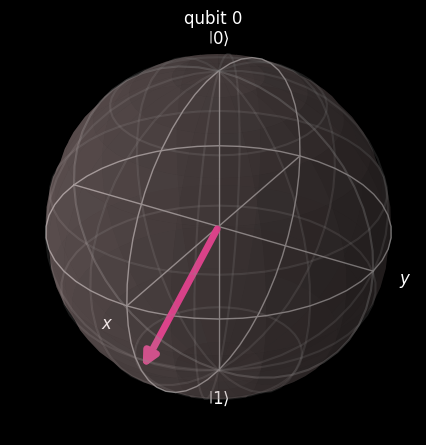

In [247]:
ψ2.draw('bloch')

# ✅ 2. Measurement in Different Bases

By default, measurement is done in the Z-basis: it checks whether the qubit is closer to |0⟩ or |1⟩.

But we can measure in X or Y basis using gate tricks!

| Desired Basis | Gate(s) to Apply Before Measure | Final Measurement Equivalent |
|---------------|-------------------------------|------------------------------  |
| **X basis**   | H                             | `Measure in Z after H`         |
| **Y basis**   | S† → H                        | `Measure in Z after S† and H`  |
| **Z basis**   | (nothing)                     | `Standard computational basis` |

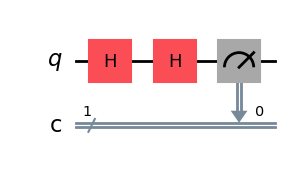

In [248]:
#Y to X basis
qc1 = QuantumCircuit(1, 1)
qc1.h(0)               # Start in |+⟩ (X basis state)
qc1.h(0)               # Rotate X basis to Z basis
qc1.measure(0, 0)      # Now measure in Z basis (equivalent to original X basis)
qc1.draw('mpl')
# ρ1=Statevector.from_instruction(qc1) # Statevector form
# ρ1.draw('latex')

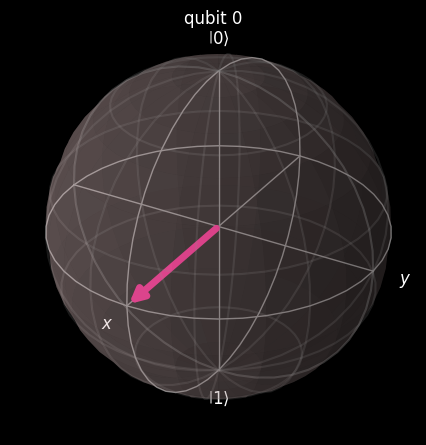

In [249]:
#Y to Z basis

qc2 = QuantumCircuit(1, 1)
qc2.sdg(0)   # Inverse of S gate
qc2.h(0)
ρ1=Statevector.from_instruction(qc2) #
ρ1.draw('bloch')
# qc2.measure(0, 0)
# qc2.draw('mpl')

# ✅ 4. Hands-On Practice: Interference + Kickback
## 🧪 Interference Example

In [250]:
qcir = QuantumCircuit(1, 1)
qcir.h(0)         # Create |+>
qcir.z(0)         # Flip phase of |1⟩: now |−⟩
qcir.h(0)         # Interfere
qcir.measure(0,0)


In [254]:

from qiskit_aer import AerSimulator
from qiskit.execute_function import execute
backend = Aer.get_backend('statevector_simulator')
simulator = AerSimulator()
compiled_circuit = transpile(qcir, simulator)
result = execute(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("Measurement results:", counts)


ModuleNotFoundError: No module named 'qiskit.execute_function'